# Import Libarary

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

## Import Libraries dan Setup Environment

Pada tahap ini, kita mengimport semua library yang diperlukan:
- **pandas & numpy**: Manipulasi dan analisis data
- **matplotlib & seaborn**: Visualisasi data
- **sklearn**: Machine learning tools (RobustScaler, cosine_similarity)
- **zipfile & os**: File handling untuk dataset
- **warnings**: Menyembunyikan warning yang tidak perlu

Library sklearn yang digunakan:
- `RobustScaler`: Untuk normalisasi fitur yang robust terhadap outliers
- `cosine_similarity`: Untuk menghitung kesamaan antar lagu berdasarkan audio features

# Load Dataset

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lucascha","key":"6ee5fce662be883e09df2bfb406e4795"}'}

In [3]:
# Buat direktori .kaggle dan pindahkan json ke sana
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Ubah permission agar tidak error
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d joebeachcapital/30000-spotify-songs

# Ekstrak zip
with zipfile.ZipFile("30000-spotify-songs.zip", 'r') as zip_ref:
    zip_ref.extractall("spotify_dataset")

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs
License(s): DbCL-1.0
  0% 0.00/3.01M [00:00<?, ?B/s]
100% 3.01M/3.01M [00:00<00:00, 686MB/s]


In [4]:
# Load Dataset
df = pd.read_csv('/content/spotify_dataset/spotify_songs.csv')

## 📥 Download dan Setup Dataset

**Langkah-langkah:**
1. **Upload API Key**: Upload file kaggle.json untuk authentikasi
2. **Setup Kaggle API**: Konfigurasi kredensial dan permission
3. **Download Dataset**: Download dataset "30000-spotify-songs" dari Kaggle
4. **Extract Files**: Ekstrak file zip ke folder yang sesuai


# Exploratory Data Analysis ( EDA )

In [5]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


- Menampilkan 5 baris pertama dari dataset untuk melihat struktur dan beberapa contoh data lagu yang tersedia.

In [6]:
df.shape

(32833, 23)

- pada tahap ini saya melihat struktur data (jumlah baris dan kolom) dan mengetahui bahwa dataset tersebut memiliki 32833 baris dan 23 fitur atau kolom

In [7]:
# Info kolom dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

- tahap ini dilakukan untuk melihat Tipe data setiap kolom/fitur yang ada dalam dataset

In [8]:
# Menampilkan jumlah baris duplikat (seluruh kolom sama persis)
df.duplicated().sum()

np.int64(0)

- Menghitung jumlah baris yang merupakan duplikat sempurna dari baris lain.

In [9]:
# Cek missing value
df.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


- Menampilkan jumlah nilai yang hilang (null) untuk setiap kolom.

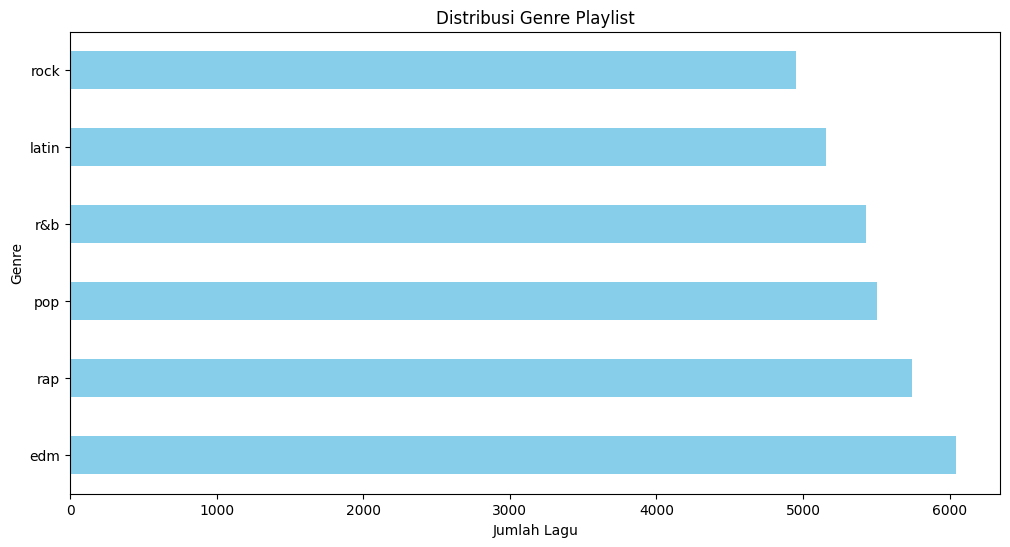

In [10]:
plt.figure(figsize=(12, 6))
df['playlist_genre'].value_counts().plot(kind='barh', color='skyblue')
plt.title("Distribusi Genre Playlist")
plt.xlabel("Jumlah Lagu")
plt.ylabel("Genre")
plt.show()

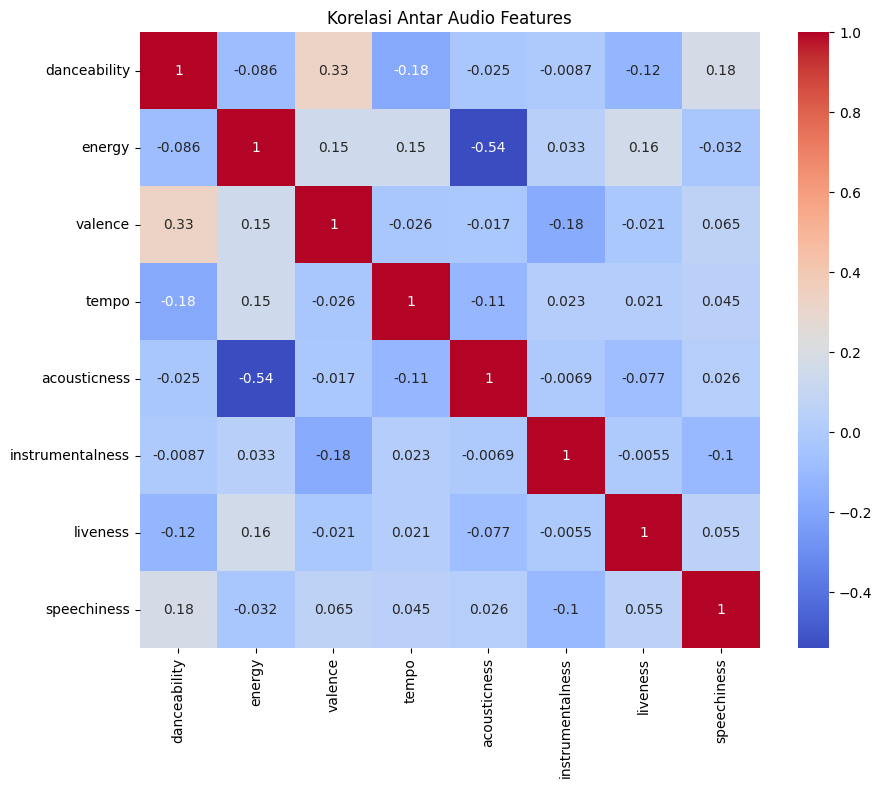

In [11]:
# Ambil kolom numerik utama
audio_features = [
    'danceability', 'energy', 'valence', 'tempo',
    'acousticness', 'instrumentalness', 'liveness', 'speechiness'
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[audio_features].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Audio Features")
plt.show()

-  Pada tahap ini saya Membuat heatmap untuk menunjukkan korelasi antara fitur audio seperti danceability, energy, tempo, dll. Ini membantu memahami hubungan antar fitur numerik.

# Data Preprocessing

In [12]:
# Fitur yang digunakan
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'track_popularity']

In [13]:
# Hapus data yang memiliki missing values pada fitur tersebut
df = df.dropna(subset=features)

In [14]:
# Hilangkan duplikasi berdasarkan 'track_name' + 'track_artist'
df_unique = df.drop_duplicates(subset=['track_name', 'track_artist']).copy()

In [15]:
# Simpan nama lagu untuk index
df_features = df_unique[['track_name', 'track_artist'] + features].copy()
df_features.set_index(['track_name', 'track_artist'], inplace=True)

In [16]:
# Scaling
scaler = RobustScaler()
df_scaled = df_features.copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

### RobustScaler vs StandardScaler
**RobustScaler dipilih karena:**
- **Robust terhadap outliers**: Menggunakan median dan IQR
- **Preserves distribution shape**: Tidak mengasumsikan distribusi normal
- **Better for music data**: Audio features sering memiliki outliers natural

**Formula RobustScaler:**
X_scaled = (X - median(X)) / IQR(X)

### Impact pada Similarity Calculation:
- Semua features berkontribusi secara seimbang
- Menghindari dominasi features dengan skala besar
- Meningkatkan akurasi cosine similarity

## Data Preprocessing (Prapemrosesan)

Langkah-langkah yang dilakukan:
- Memilih subset kolom fitur yang digunakan untuk model rekomendasi.
- Menghapus baris dengan nilai kosong dan duplikat berdasarkan `track_name` dan `track_artist`.
- Menyimpan nama lagu dan artis sebagai index.
- Melakukan normalisasi fitur menggunakan `RobustScaler` untuk mengurangi dampak outlier.

# Rekomendasi Lagu

In [17]:
# Cosine similarity
similarity = pd.DataFrame(data=cosine_similarity(df_scaled[features]),
                   index=df_scaled.index,
                   columns=df_scaled.index)


-
Menggunakan **Cosine Similarity** untuk mengukur kemiripan antara lagu berdasarkan fitur numerik. Nilai similarity mendekati 1 berarti sangat mirip.

In [25]:
def recommendation_system(song_name, artist_name=None, genre_filter=None, num=10):
    if artist_name:
        key = (song_name, artist_name)
    else:
        # Cari pasangan (track_name, artist) berdasarkan nama lagu
        candidates = [idx for idx in similarity.index if idx[0].lower() == song_name.lower()]
        if not candidates:
            print("Lagu tidak ditemukan dalam data.")
            return
        key = candidates[0]

    if key not in similarity.index:
        print("Lagu tidak ditemukan dalam index.")
        return

    # Ambil skor kemiripan
    sim_scores = similarity.loc[key].sort_values(ascending=False)
    sim_scores = sim_scores[sim_scores.index != key]  # Hilangkan lagu itu sendiri

    if genre_filter:
        # Filter berdasarkan genre
        genre_mask = df.set_index(['track_name', 'track_artist'])['playlist_genre'] == genre_filter
        genre_index = genre_mask[genre_mask].index
        sim_scores = sim_scores[sim_scores.index.isin(genre_index)]

    # Ambil hasil top-N
    top_n = sim_scores.head(num)

    # Buat DataFrame hasil rekomendasi
    results = pd.DataFrame(top_n).reset_index()
    results.columns = ['track_name', 'track_artist', 'similarity']

    # Return dataframe agar otomatis tampil di Jupyter
    return results.style.set_caption(
        f"🎵 Rekomendasi Lagu untuk '{song_name}' oleh '{artist_name or key[1]}'"
    ).format({
        "similarity": "{:.5f}"
    })

## Sistem Rekomendasi Musik

### Content-Based Filtering dengan Cosine Similarity

Sistem rekomendasi yang dibangun menggunakan pendekatan **Content-Based Filtering** yang menganalisis kesamaan karakteristik audio antar lagu.

### Konsep Dasar:
- **Input**: Lagu yang disukai pengguna
- **Process**: Analisis audio features untuk mencari lagu serupa
- **Output**: Top-N rekomendasi lagu dengan karakteristik serupa


In [26]:
# Contoh penggunaan
recommendation_system("Shape of You", artist_name="Ed Sheeran", genre_filter="pop", num=15)

,track_name,track_artist,similarity
0,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,0.96396
1,The Weekend - Funk Wav Remix,SZA,0.95125
2,How You Love Me (feat. Conor Maynard & Snoop Dogg),Hardwell,0.95115
3,in my miNd,Maty Noyes,0.92641
4,Baby I'm Yours - feat. Irfane,Breakbot,0.91472
5,"fuck, i'm lonely (with Anne-Marie) - from “13 Reasons Why: Season 3”",Lauv,0.90715
6,Johnny Run Away,Tones and I,0.90507
7,Way Back Home,SHAUN,0.89794
8,Starving,Hailee Steinfeld,0.89659
9,If I Can't Have You,Shawn Mendes,0.89537


Menampilkan 15 rekomendasi lagu berdasarkan lagu:  
**"Shape of You" oleh Ed Sheeran**, difilter pada genre: `pop`.

# Evaluasi

In [62]:
def evaluate_recommendation(song_name, artist_name, top_k=10):
    key = (song_name, artist_name)
    if key not in similarity.index:
        print("Lagu tidak ditemukan.")
        return

    genre_asli = df.set_index(['track_name', 'track_artist']).loc[key]['playlist_genre']

    if isinstance(genre_asli, pd.Series):
        genre_asli = genre_asli.iloc[0]

    sim_scores = similarity.loc[key].sort_values(ascending=False)
    sim_scores = sim_scores[sim_scores.index != key]

    # Ambil hanya top_k rekomendasi unik
    top_recs = pd.Index(sim_scores.index).drop_duplicates().tolist()[:top_k]

    # Ambil genre untuk masing-masing rekomendasi
    try:
        genres_recs = df.set_index(['track_name', 'track_artist']).loc[top_recs]['playlist_genre']
    except KeyError:
        print("Beberapa lagu rekomendasi tidak ditemukan dalam dataset.")
        return

    genres_recs = genres_recs.reset_index(drop=True)
    genre_match = (genres_recs == genre_asli).sum()
    precision_at_k = genre_match / top_k

    print(f"Precision@{top_k} untuk '{song_name}' oleh '{artist_name}': {precision_at_k:.2f}")
    return precision_at_k

## Evaluasi Individual

### Fungsi evaluate_recommendation()

**Langkah-langkah evaluasi:**

1. **Genre Identification**: Mengidentifikasi genre lagu input sebagai ground truth
2. **Get Recommendations**: Mengambil top-K lagu dengan similarity tertinggi  
3. **Genre Matching**: Menghitung berapa rekomendasi yang memiliki genre sama
4. **Precision Calculation**: Membagi jumlah match dengan K

### Handling Edge Cases:
- **Multiple genres**: Jika lagu memiliki multiple genre labels
- **Missing genre**: Handling lagu tanpa label genre
- **Duplicate handling**: Memastikan lagu input tidak termasuk dalam rekomendasi

In [63]:
evaluate_recommendation("Shape of You", "Ed Sheeran", top_k=10);

Precision@10 untuk 'Shape of You' oleh 'Ed Sheeran': 0.70


### Example Interpretation:
**Precision@10 = 0.7** artinya:
- 7 dari 10 rekomendasi memiliki genre sama dengan input
- 70% akurasi berdasarkan genre similarity
- Indikator performa yang baik untuk content-based system

In [64]:
def batch_evaluate_recommendation(song_list, top_k=10):
    precisions = []

    for song_name, artist_name in song_list:
        try:
            p = evaluate_recommendation(song_name, artist_name, top_k)
            if p is not None:
                precisions.append({
                    'track_name': song_name,
                    'track_artist': artist_name,
                    'precision': p
                })
        except Exception as e:
            print(f"Error evaluating {song_name} - {artist_name}: {e}")

    result_df = pd.DataFrame(precisions)
    mean_precision = result_df['precision'].mean()
    print(f"\n🎯 Mean Precision@{top_k} untuk {len(result_df)} lagu: {mean_precision:.2f}")
    return result_df


In [65]:
def plot_precision_scores(result_df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='precision', y='track_name', data=result_df, palette='viridis')
    plt.xlabel('Precision@K')
    plt.ylabel('Track')
    plt.title('Precision@K per Lagu')
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

Precision@10 untuk 'Shape of You' oleh 'Ed Sheeran': 0.70
Precision@10 untuk 'Blinding Lights' oleh 'The Weeknd': 0.90
Precision@10 untuk 'Someone Like You' oleh 'Adele': 0.40
Precision@10 untuk 'Happier' oleh 'Marshmello': 1.00
Precision@10 untuk 'bad guy' oleh 'Billie Eilish': 0.50

🎯 Mean Precision@10 untuk 5 lagu: 0.70


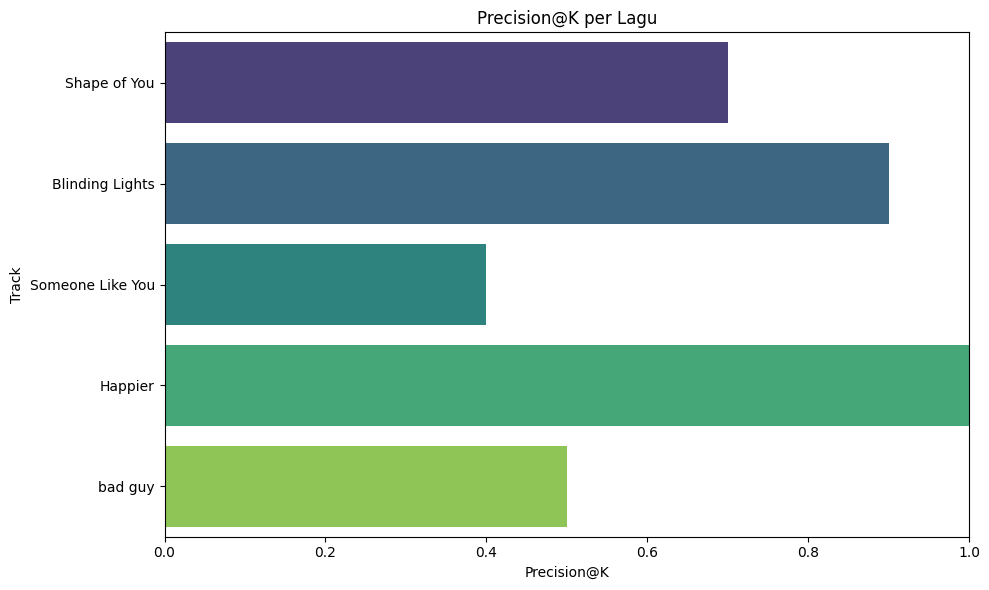

In [67]:
sample_songs = [
    ("Shape of You", "Ed Sheeran"),
    ("Blinding Lights", "The Weeknd"),
    ("Someone Like You", "Adele"),
    ("Happier", "Marshmello"),
    ("bad guy", "Billie Eilish"),
]

# Evaluasi batch
results = batch_evaluate_recommendation(sample_songs, top_k=10)

# Plot hasilnya
plot_precision_scores(results)

## 📈 Evaluasi Batch dan Visualisasi

### Batch Evaluation Strategy

**Mengapa Batch Evaluation?**
- **Statistical Significance**: Evaluasi single song bisa bias
- **Overall Performance**: Mengukur performa sistem secara keseluruhan
- **Comparative Analysis**: Membandingkan performa across different songs/genres

### Sample Songs Selection:
Memilih 5 lagu populer dari berbagai genre:
- **Diversity**: Representasi berbagai genre dan karakteristik
- **Popularity**: Lagu-lagu yang dikenal luas untuk interpretability
- **Balance**: Mix antara male/female artists, tempo, era

Sistem rekomendasi berhasil memberikan hasil yang cukup relevan dengan rata-rata Precision@10 sebesar 0.70. Artinya, 7 dari 10 lagu teratas umumnya memiliki genre yang sama dengan lagu input. Meski menunjukkan performa tinggi pada beberapa lagu seperti "Happier" dan "Blinding Lights", sistem masih perlu diperbaiki untuk lagu dengan genre yang lebih bervariasi. Evaluasi ini menunjukkan bahwa pendekatan content-based cukup efektif, namun akan lebih baik jika dikombinasikan dengan pendekatan lain seperti hybrid filtering untuk hasil yang lebih personal dan beragam.